In [1]:
# This changes the current directory to the base saga directory - make sure to run this first!
# This is necessary to be able to import the py files and use the right directories,
# while keeping all the notebooks in their own directory.
import os
import sys

if 'saga_base_dir' not in locals():
    saga_base_dir = os.path.abspath('..')
if saga_base_dir not in sys.path:
    os.chdir(saga_base_dir)

In [70]:
from __future__ import print_function, division

import hosts

import numpy as np

import healpy

from astropy import units as u
from astropy.coordinates import SkyCoord, UnitSphericalRepresentation, CartesianRepresentation

In [3]:
%matplotlib inline

from matplotlib import pyplot as plt

## Load HSC Map 

In [30]:
hscmap, hschead = healpy.read_map('S16A_wide2_fdfc_i_limitmag_hp_frac_cut_0.02.fits', h=True)
hschead = dict(hschead)  #This is a VERY foolish healpy design choice!!

NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


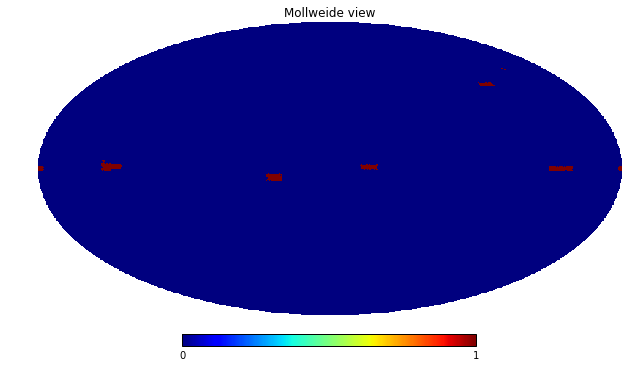

In [17]:
healpy.mollview(hscmap)

### Test that the `query_disc` function behaves sensibly

In [65]:
def query_disc_astropy(cen, rad, nside=hschead['NSIDE'], **kwargs):
    uvec = cen.represent_as(UnitSphericalRepresentation).represent_as(CartesianRepresentation).xyz
    return healpy.query_disc(nside, uvec, rad.to(u.radian).value)

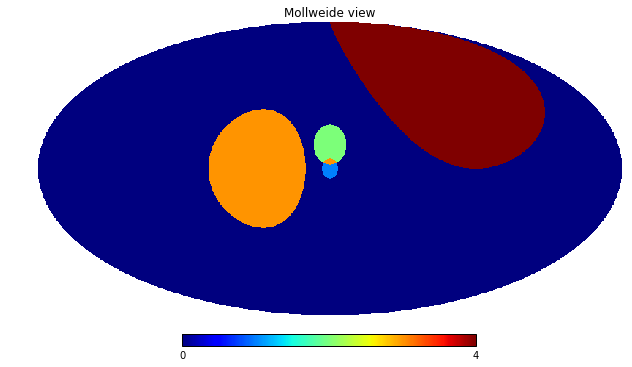

In [67]:
scs = SkyCoord([0, 0, 45, 270]*u.deg, [0, 12, 0,45]*u.deg)
rads = [5, 10, 30, 45]*u.deg


pixin = np.zeros_like(hscmap)
for i, (sc, rad) in enumerate(zip(scs, rads)):
    
    pixin[query_disc_astropy(sc, rad)] += i+1
    
healpy.mollview(pixin)

## Load SAGA Hosts 

In [84]:
hostlst = hosts.get_saga_hosts_from_google() #'named' hosts
hostdct = {host.name:host for host in hostlst}

Using cached version of google hosts list from file "hosts_dl.pkl2"


In [85]:
nametofrac_environs = {}
nametofrac_1deg = {}
for host in hostlst:
    cen = host.coords
    rad = host.environsarcmin*u.arcmin
    
    host_pix = query_disc_astropy(cen, rad)
    nametofrac_environs[host.name]= np.sum(hscmap[host_pix])/len(host_pix)
    
    host_pix = query_disc_astropy(cen, 1*u.deg)
    nametofrac_1deg[host.name]= np.sum(hscmap[host_pix])/len(host_pix)
nametofrac, nametofrac_1deg

({'Aeneid': 0.0,
  'Alice': 0.75419776119402981,
  'AnaK': 0.0,
  'Bandamanna': 0.0,
  'Beowulf': 0.0,
  'Catch22': 0.0,
  'Dune': 1.0,
  'Gilgamesh': 0.0,
  'Hamlet': 0.0,
  'HarryPotter': 0.0,
  'MobyDick': 0.0,
  'Narnia': 0.0,
  'OBrother': 0.0,
  'Odyssey': 0.0,
  'Othello': 0.66015352407536632,
  'Oz': 0.0,
  'ScoobyDoo': 0.0,
  'Sopranos': 0.0,
  'StarTrek': 0.0,
  'Ulysses': 0.0},
 {'Aeneid': 0.0,
  'Alice': 0.69176470588235295,
  'AnaK': 0.0,
  'Bandamanna': 0.0,
  'Beowulf': 0.0,
  'Catch22': 0.0,
  'Dune': 0.99765380604796661,
  'Gilgamesh': 0.0,
  'Hamlet': 0.0,
  'HarryPotter': 0.0,
  'MobyDick': 0.0,
  'Narnia': 0.0,
  'OBrother': 0.0,
  'Odyssey': 0.0,
  'Othello': 0.55830941821027913,
  'Oz': 0.0,
  'ScoobyDoo': 0.0,
  'Sopranos': 0.034680573663624509,
  'StarTrek': 0.0,
  'Ulysses': 0.0})

In [92]:
for hnm, frac in nametofrac_environs.items():
    if frac>0:
        print(hnm)
        print(frac)
        print(hostdct[hnm].coords)
        print('http://legacysurvey.org/viewer-dev?zoom=10&ra={0.ra.value}&dec={0.dec.value}'.format(hostdct[hnm].coords))
        print('')

Alice
0.754197761194
<SkyCoord (ICRS): (ra, dec) in deg
    (180.09842901, -1.10007802)>
http://legacysurvey.org/viewer-dev?zoom=10&ra=180.09842901&dec=-1.10007802185

Dune
1.0
<SkyCoord (ICRS): (ra, dec) in deg
    (221.54636342, -0.22294192)>
http://legacysurvey.org/viewer-dev?zoom=10&ra=221.546363418&dec=-0.222941918742

Othello
0.660153524075
<SkyCoord (ICRS): (ra, dec) in deg
    (224.59449022, -1.0910162)>
http://legacysurvey.org/viewer-dev?zoom=10&ra=224.594490222&dec=-1.09101619717

